### 1. Import necessary libraries

In [93]:
import os
import mne
import glob
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
# %matplotlib qt # -> in case I want to plot the figures so they are interactive 

### 2. Getting the data

In [94]:
DATA_CONTROL = 'Data/HC/'
files_control = sorted(glob.glob(DATA_CONTROL + '*.set'))

DATA_SCHIZ = 'Data/schiz/'
files_schiz = sorted(glob.glob(DATA_SCHIZ + '*.set'))

print(f"\nHealthy control head: {files_control[:10]}\nSchizoprhenia head: {files_schiz[:10]}") # just to check some of the files for reference


Healthy control head: ['Data/HC\\HCP000.set', 'Data/HC\\HCP001.set', 'Data/HC\\HCP005.set', 'Data/HC\\HCP006.set', 'Data/HC\\HCP007.set', 'Data/HC\\HCP008.set', 'Data/HC\\HCP010.set', 'Data/HC\\HCP011.set', 'Data/HC\\HCP013.set', 'Data/HC\\HCP014.set']
Schizoprhenia head: ['Data/schiz\\SCH002.set', 'Data/schiz\\SCH003.set', 'Data/schiz\\SCH005.set', 'Data/schiz\\SCH006.set', 'Data/schiz\\SCH007.set', 'Data/schiz\\SCH008.set', 'Data/schiz\\SCH009.set', 'Data/schiz\\SCH010.set', 'Data/schiz\\SCH014.set', 'Data/schiz\\SCH017.set']


In [95]:
# See general information about the first file of the healthy control group
file1_ctrl = files_control[0]
raw_ctrl = mne.io.read_raw(file1_ctrl, preload=True)

print(f"\n----- Info for the 1st file of the healthy control -----\n\n{raw_ctrl.info}\n")

Reading c:\Users\cesar_5w126xu\Documents\UGent\2024-2025\Second-semester\Neurophysiological-Signal-Processing\Neurophysiological-Signal-Processing-Project\Data\HC\HCP000.fdt
Reading 0 ... 1110127  =      0.000 ...  4336.434 secs...


C:\Users\cesar_5w126xu\AppData\Local\Temp\ipykernel_6380\1224570477.py:3: RuntimeWarning: Data file name in EEG.data (fffNorm00000.fdt) is incorrect, the file name must have changed on disk, using the correct file name (HCP000.fdt).
  raw_ctrl = mne.io.read_raw(file1_ctrl, preload=True)



----- Info for the 1st file of the healthy control -----

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, A1, T3, ...
 chs: 68 EEG
 custom_ref_applied: False
 dig: 71 items (3 Cardinal, 68 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 256.0 Hz
>



In [96]:
# See general information about the first file of the schizophrenia group
file1_schz = files_schiz[0]
raw_schz = mne.io.read_raw(file1_schz, preload=True)

print(f"\n----- Info for the 1st file of the Schizophrenia control -----\n\n{raw_schz.info}\n")

Reading c:\Users\cesar_5w126xu\Documents\UGent\2024-2025\Second-semester\Neurophysiological-Signal-Processing\Neurophysiological-Signal-Processing-Project\Data\schiz\SCH002.fdt
Reading 0 ... 227839  =      0.000 ...   889.996 secs...

----- Info for the 1st file of the Schizophrenia control -----

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, A1, T3, ...
 chs: 68 EEG
 custom_ref_applied: False
 dig: 71 items (3 Cardinal, 68 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 256.0 Hz
>



C:\Users\cesar_5w126xu\AppData\Local\Temp\ipykernel_6380\2489659496.py:3: RuntimeWarning: Data file name in EEG.data (fffpatient002.fdt) is incorrect, the file name must have changed on disk, using the correct file name (SCH002.fdt).
  raw_schz = mne.io.read_raw(file1_schz, preload=True)


### 3. Plotting the data

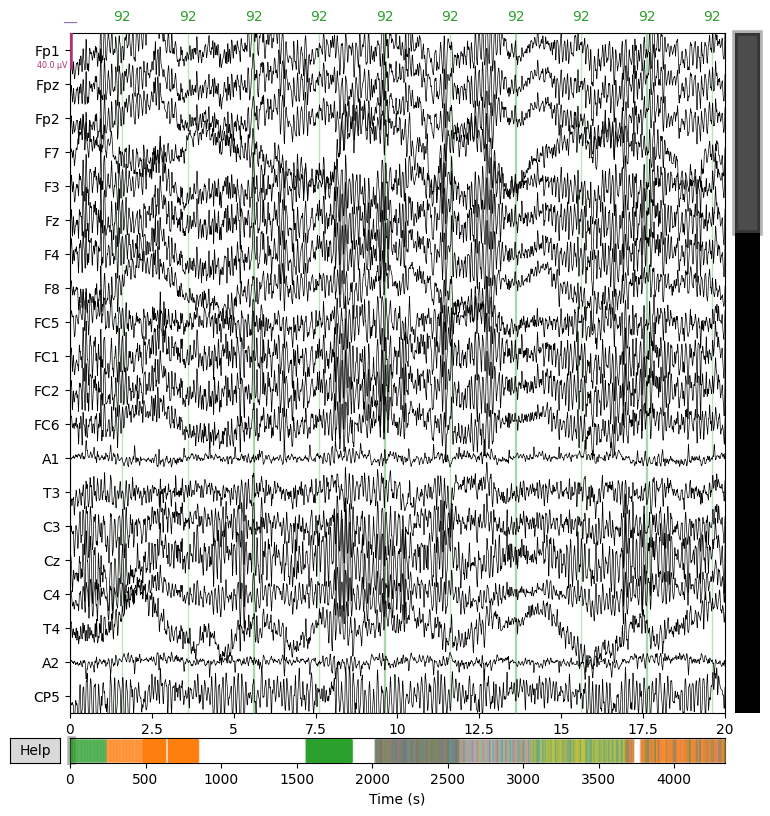

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\cesar_5w126xu\AppData\Local\Temp\ipykernel_6380\1595425163.py:4: UserWarning: Zero value in spectrum for channel Test
  fig = raw_ctrl.compute_psd(fmax= 100).plot()
C:\Users\cesar_5w126xu\AppData\Local\Temp\ipykernel_6380\1595425163.py:4: UserWarning: Infinite value in PSD for channel Test.
These channels might be dead.
  fig = raw_ctrl.compute_psd(fmax= 100).plot()
c:\Users\cesar_5w126xu\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


In [97]:
# Healthy control - plotting the power spectral density and the raw data
# raw_ctrl.annotations.append(onset=0, duration=0, description='Control EEG - Raw Data')
fig = raw_ctrl.plot(duration = 20)
fig = raw_ctrl.compute_psd(fmax= 100).plot() 

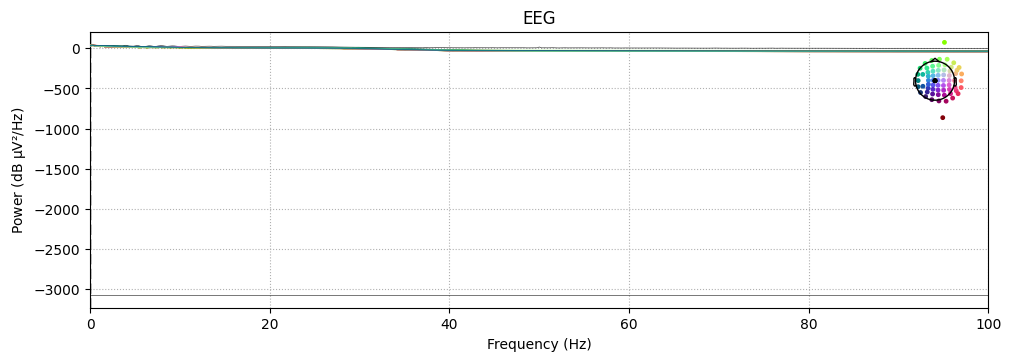

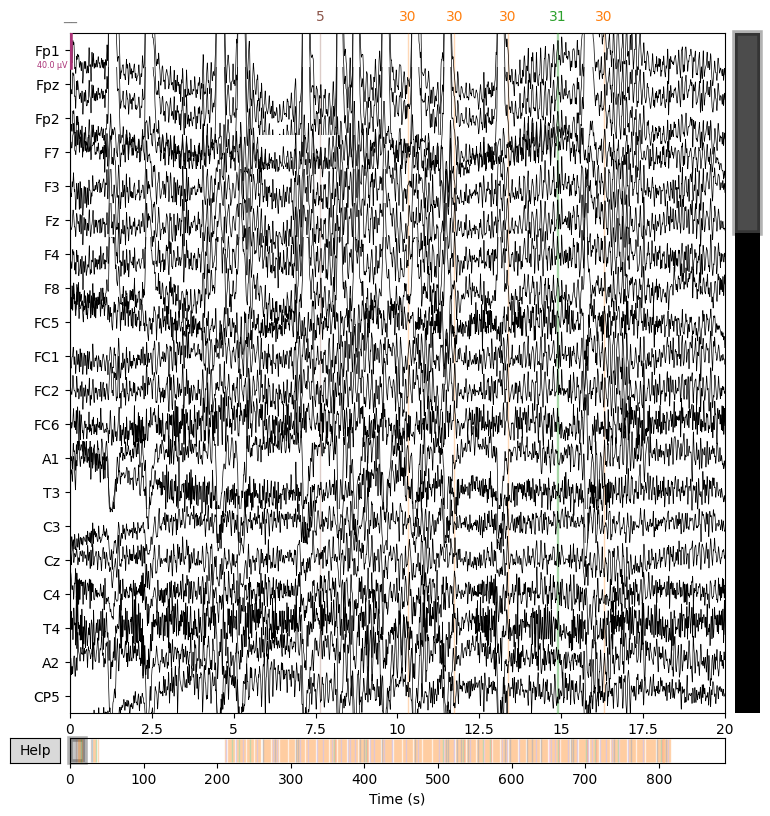

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\cesar_5w126xu\AppData\Local\Temp\ipykernel_6380\2110077414.py:3: UserWarning: Zero value in spectrum for channel Test
  fig = raw_schz.compute_psd(fmax= 100).plot()
C:\Users\cesar_5w126xu\AppData\Local\Temp\ipykernel_6380\2110077414.py:3: UserWarning: Infinite value in PSD for channel Test.
These channels might be dead.
  fig = raw_schz.compute_psd(fmax= 100).plot()
c:\Users\cesar_5w126xu\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


In [98]:
# Schizophrenia - plotting the power spectral density and the raw data
fig = raw_schz.plot(duration = 20)
fig = raw_schz.compute_psd(fmax= 100).plot()

### 4. Filtering the data

In [99]:
# First, three Butterworth apply 3 butterworth filters: 
# 1. High-pass filter with cut-off frequency at 0.1 Hz, removing DC
# 2. Low-pass filter with a cut-off frequency at 30 Hz 
# 3. Band-stop filter with range of 48 Hz to 52 Hz, removing 50 Hz mains hum

# Function for the initial filtering of the data
def data_filtering(raw_signal):

    raw = raw_signal.copy() # ensure that the original data is not modified

    # High-pass filter
    raw.filter(l_freq=0.1, h_freq=None, method='iir', iir_params={'order': 2, 'ftype': 'butter'})
    
    # Low-pass filter
    raw.filter(l_freq=None, h_freq=30, method='iir', iir_params={'order': 2, 'ftype': 'butter'})
    
    # Band-stop filter
    raw.filter(l_freq=52, h_freq=48, method='iir', iir_params={'order': 2, 'ftype': 'butter'})
    
    return raw


 --- Filtering the healthy control data ---

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 0.10 Hz: -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 30.00 Hz: -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 48 - 52 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 48.00, 52.00 Hz: -6.02, -6.02 dB



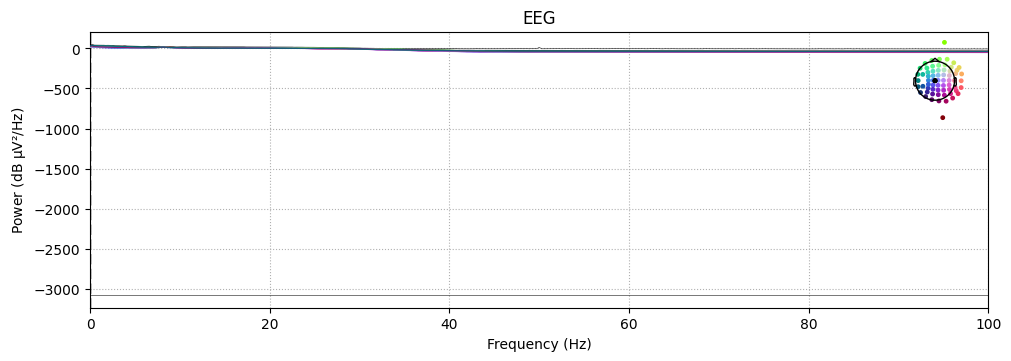

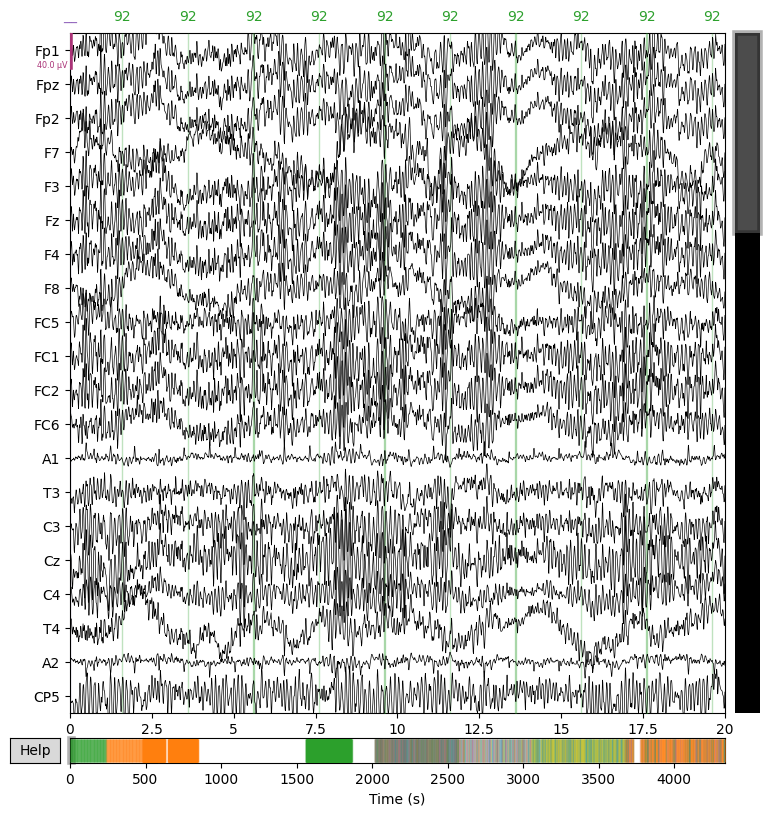

In [100]:
# For healthy control data
print("\n --- Filtering the healthy control data ---\n")
filtered_raw_ctrl = data_filtering(raw_ctrl)
fig = filtered_raw_ctrl.plot(duration = 20)


 --- Filtering the schizophrenia data ---

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 0.10 Hz: -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 30.00 Hz: -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 48 - 52 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 48.00, 52.00 Hz: -6.02, -6.02 dB



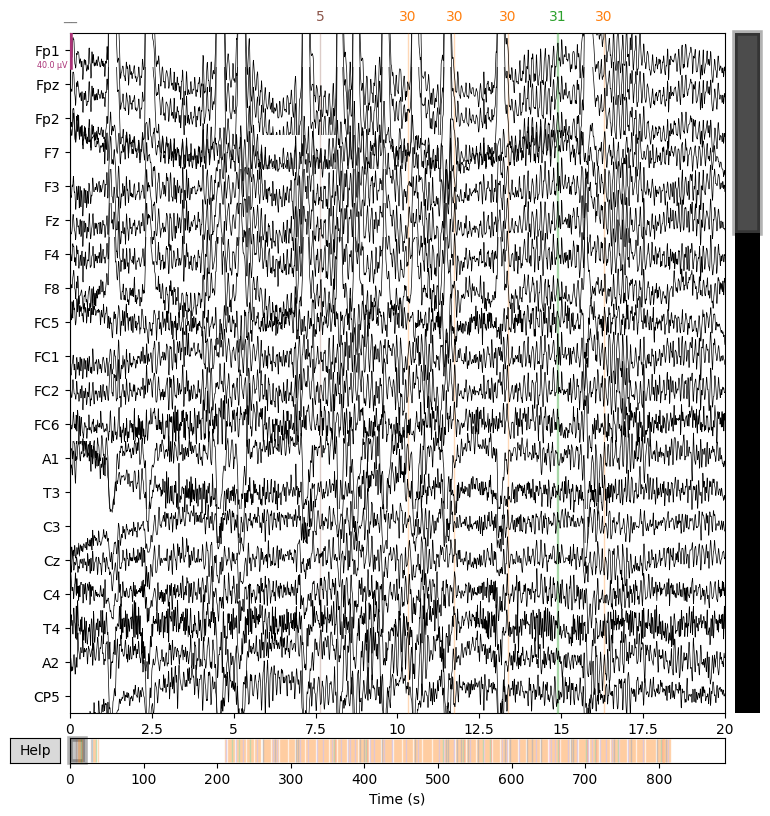

In [101]:
# For schizophrenia data
print("\n --- Filtering the schizophrenia data ---\n")
filtered_raw_schz = data_filtering(raw_schz)
fig = filtered_raw_schz.plot(duration = 20)

### 5. Epoch the signals

Event IDs for the P300 analysis:

**30:** Auditory Standard<br>
**31:** Auditory Target<br>
**32:** Auditory Distractor<br>

1. Epoch signals with a [-200, 800] ms peristimulus interval for the P300 paradigms
2. Baseline correction and rereferencing to linked ears

In [102]:
event_ids = {"30": 30, "31": 31, "32": 32}
audP300_events_ctrl, audP300_events_id = mne.events_from_annotations(filtered_raw_ctrl, event_ids)

Used Annotations descriptions: ['30', '31', '32']


In [103]:
#  Epoching the data
# 1. Epoch signals with a [-200, 800] ms peristimulus interval for the P300 paradigms
# 2. Baseline correction and rereferencing to linked ears

# Function for the epoching of the data
def epoch_data(signal, signal_events, event_id, t_min, t_max):
    
    epochs = mne.Epochs(signal, signal_events, event_id, tmin=t_min, tmax=t_max, preload=True,verbose=False)
    epochs.apply_baseline(baseline=(t_min, 0.0),verbose=False)
    epochs.set_eeg_reference(ref_channels=['A1', 'A2'],ch_type='eeg',verbose=False)  # seting channels A1 and A2 (ears) as reference
    epochs.pick(['Fz','Cz','Pz']) # relevant electrodes for P300

    return epochs

Standard epochs: 315
Target epochs: 42
Deviation epochs: 41


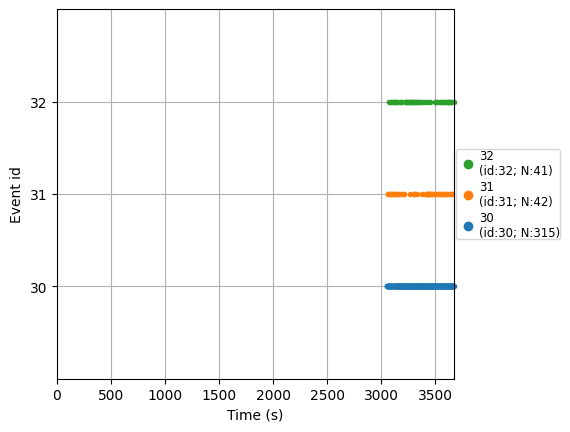

In [104]:
standard_epochs_ctrl = epoch_data(filtered_raw_ctrl, audP300_events_ctrl, event_id=30, t_min=-0.2, t_max=0.8)
target_epochs_ctrl = epoch_data(filtered_raw_ctrl, audP300_events_ctrl, event_id=31, t_min=-0.2, t_max=0.8)
deviation_epochs_ctrl = epoch_data(filtered_raw_ctrl, audP300_events_ctrl, event_id=32, t_min=-0.2, t_max=0.8)

print(f"Standard epochs: {len(standard_epochs_ctrl)}")
print(f"Target epochs: {len(target_epochs_ctrl)}")
print(f"Deviation epochs: {len(deviation_epochs_ctrl)}")

# Plotting the events for the healthy control group - just to have a better overview
fig = mne.viz.plot_events(events=audP300_events_ctrl, event_id=event_ids, sfreq=filtered_raw_ctrl.info["sfreq"], first_samp=filtered_raw_ctrl.first_samp, show=True)
# Why are the events shown only from 3000s onwards?


### 6. Artifact removal

1. Remove based on 3 criteria:

    - Absolute maximum > 80uV
    - Peak-to-peak maximum > 120uV
    - Flat segment rejection (anything with amplitude < 1uV)

2. Average epochs grouped by stimulus-specific responses
3. Apply low-pass filter and baseline correction

In [105]:
# Rejecting based on absolute maximum amplitude and flat signal

# Function for artifact rejection based on absolute maximum and flat signal
def artifact_rejection(epochs, abs_maximum, flat_ampl):
    
    epochs_data = epochs.get_data()

    artifact_epochs_std_ctrl = []

    for i, epoch in enumerate(epochs_data):

        flat_signal = (np.ptp(epoch, axis=1) < flat_ampl).any() # minimal activity for signal not to be flat: 1uV
        high_amplitude = (epoch.max(axis=1) > abs_maximum).any() # 80uV threshold

        if flat_signal or high_amplitude: 
            artifact_epochs_std_ctrl.append(i)

    epochs.drop(artifact_epochs_std_ctrl)

    return epochs

peakToPeakRejection = dict(eeg=120e-6) # peak-to-peak amplitude rejection: > 120uV

In [ ]:
# Removing artifacts from the epochs of the healthy control group
epochs_std_ctrl = artifact_rejection(standard_epochs_ctrl, abs_maximum=80e-6, flat_ampl=1e-6)
epochs_std_ctrl.drop_bad(reject=peakToPeakRejection)

epochs_tgt_ctrl = artifact_rejection(target_epochs_ctrl, abs_maximum=80e-6, flat_ampl=1e-6)
epochs_tgt_ctrl.drop_bad(reject=peakToPeakRejection)

epochs_dst_ctrl = artifact_rejection(deviation_epochs_ctrl, abs_maximum=80e-6, flat_ampl=1e-6)
epochs_dst_ctrl.drop_bad(reject=peakToPeakRejection)

print(f"\nStandard epochs: {len(epochs_std_ctrl)}\nTarget epochs: {len(epochs_tgt_ctrl)}\nDeviation epochs: {len(epochs_dst_ctrl)}")


Dropped 94 epochs: 1, 3, 5, 6, 8, 9, 10, 11, 12, 14, 15, 17, 18, 26, 28, 42, 45, 47, 48, 49, 53, 56, 59, 60, 70, 76, 78, 81, 85, 92, 94, 100, 110, 112, 120, 122, 123, 125, 127, 128, 138, 141, 142, 143, 153, 158, 160, 161, 177, 186, 187, 188, 190, 193, 195, 198, 202, 204, 206, 209, 210, 217, 218, 219, 230, 231, 232, 236, 238, 240, 243, 244, 245, 248, 249, 250, 255, 257, 258, 261, 262, 264, 266, 267, 276, 277, 287, 292, 297, 299, 305, 306, 308, 311
    Rejecting  epoch based on EEG : ['Fz', 'Cz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz', 'Cz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Fz', 'Cz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz', 'Cz']
    Rejecting  epoch based on EEG : ['Fz', 'Cz', 'Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz

In [107]:

# Averaging the epochs for each event type 
evoked_std_ctrl = standard_epochs_ctrl.average()  # Standard
evoked_tgt_ctrl = target_epochs_ctrl.average()  # Target
evoked_dst_ctrl = deviation_epochs_ctrl.average()  # Distractor

# Re-aplpying low-pass filter and baseline correction
evoked_std_ctrl.filter(l_freq=None, h_freq=30, method='iir', iir_params={'order': 2, 'ftype': 'butter'})
evoked_std_ctrl.apply_baseline(baseline=(-0.2, 0))

evoked_tgt_ctrl.filter(l_freq=None, h_freq=30, method='iir', iir_params={'order': 2, 'ftype': 'butter'})
evoked_tgt_ctrl.apply_baseline(baseline=(-0.2, 0))

evoked_dst_ctrl.filter(l_freq=None, h_freq=30, method='iir', iir_params={'order': 2, 'ftype': 'butter'})
evoked_dst_ctrl.apply_baseline(baseline=(-0.2, 0))

Setting up low-pass filter at 30 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 30.00 Hz: -6.02 dB

Applying baseline correction (mode: mean)
Setting up low-pass filter at 30 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 30.00 Hz: -6.02 dB

Applying baseline correction (mode: mean)
Setting up low-pass filter at 30 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 30.00 Hz: -6.02 dB

Applying baseline correction (mode: mean)


<Evoked | '32' (average, N=13), -0.19922 – 0.80078 s, baseline -0.2 – 0 s, 3 ch, ~39 KiB>

### 7. Feature detection

In [ ]:
# def detect_peak(avg_evoked, ch_name, tmin, tmax, direction='pos', force=True):
def detect_peak(avg_evoked, channel, tmin, tmax, direction):
        times = avg_evoked.times # time vector in seconds
        data = avg_evoked.copy().pick(channel).data[0] # get data for the specified channel
        time_interval = (times >= tmin) & (times <= tmax) # creating a mask to be applied to the signal
        signal = data[time_interval] # selecting data only within the specified time interval
        time_window = times[time_interval] # get the time points inside the window

        if len(signal) == 0: # checking that the signal is not empty
            print(f"\nNo data in the specified time window ({tmin}, {tmax}) for channel {channel}")
            return None
        
        if direction == 'positive':
            peaks = np.where((signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:]))[0] + 1
            print(f"positive peak found: {np.where((signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:]))[0]}") # just want to see what this returns

        else: # when the direction is negative
            peaks = np.where((signal[1:-1] < signal[:-2]) & (signal[1:-1] < signal[2:]))[0] + 1

        
        if len(peaks) > 0: # when peaks are found, select the biggest one and return its time and value
            peak_values = signal[peaks]
            idx = np.argmax(np.abs(peak_values))
            peak_idx = peaks[idx]
            return time_window[peak_idx], signal[peak_idx]
        
        # If no peaks are found, return the time and value of the minimum derivative
        derivative = np.abs(np.gradient(signal))
        peak_idx = np.argmin(derivative)
        return time_window[peak_idx], signal[peak_idx]
        

In [ ]:
def extract_features(evoked_target, evoked_deviation, subject_type):

    peaks_ap300 = {
        'target': {
            'N100': {'interval': [0.050, 0.160], 'direction': 'neg'},
            'P200': {'interval': [0.100, 0.250], 'direction': 'pos'},
            'N200': {'interval': [0.150, 0.310], 'direction': 'neg'},
            'P300': {'interval': [0.260, 0.450], 'direction': 'pos'},
        },
        'distractor': {
            'N100': {'interval': [0.050, 0.150], 'direction': 'neg'},
            'P200': {'interval': [0.100, 0.260], 'direction': 'pos'},
            'N200': {'interval': [0.140, 0.300], 'direction': 'neg'},
            'P300': {'interval': [0.260, 0.450], 'direction': 'pos'},
        }
    }
    peak_map = {'N100': 'N1', 'P200': 'P2', 'N200': 'N2', 'P300': 'P3'}
    channels = ['Fz', 'Cz', 'Pz']

    def detect_peak(evoked, ch_name, tmin, tmax, direction='pos', force=True):
        times = evoked.times
        data = evoked.copy().pick(ch_name).data[0]
        mask = (times >= tmin) & (times <= tmax)
        signal = data[mask]
        time_window = times[mask]
        if len(signal) == 0:
            return np.nan, np.nan
        if direction == 'pos':
            peaks = np.where((signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:]))[0] + 1
        else:
            peaks = np.where((signal[1:-1] < signal[:-2]) & (signal[1:-1] < signal[2:]))[0] + 1
        if len(peaks) > 0:
            peak_values = signal[peaks]
            idx = np.argmax(np.abs(peak_values))
            peak_idx = peaks[idx]
            return time_window[peak_idx], signal[peak_idx]
        if force:
            derivative = np.abs(np.gradient(signal))
            peak_idx = np.argmin(derivative)
            return time_window[peak_idx], signal[peak_idx]
        return np.nan, np.nan
    
    # feature extraction
    output = {'subject': subject_type}
    evoked_dict = {'target': evoked_target, 'distractor': evoked_deviation}

    for condition, peaks in peaks_ap300.items():
        tag = 'P300at' if condition == 'target' else 'P300ad'
        evoked = evoked_dict[condition]
        for peak_name, params in peaks.items():
            short = peak_map[peak_name]
            tmin, tmax = params['interval']
            direction = params['direction']
            for ch in channels:
                latency, amplitude = detect_peak(evoked, ch, tmin, tmax, direction)
                output[f"{tag}_{short}{ch}L"] = latency
                output[f"{tag}_{short}{ch}A"] = amplitude

    return output